# ДЗ №5

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Задача №1

<div>
<img src="../data/matstat1.jpg" width="600"/>
</div>

In [3]:
mu, var = 0, 1  # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 1000     # размер выборок

- __cмоделируем выборку из логнормального распределения $LogNorm(\mu, var)$__ 
- __проверим, что при логарифмировании она становится распределенной в соотв. с $Norm(\mu, var)$__

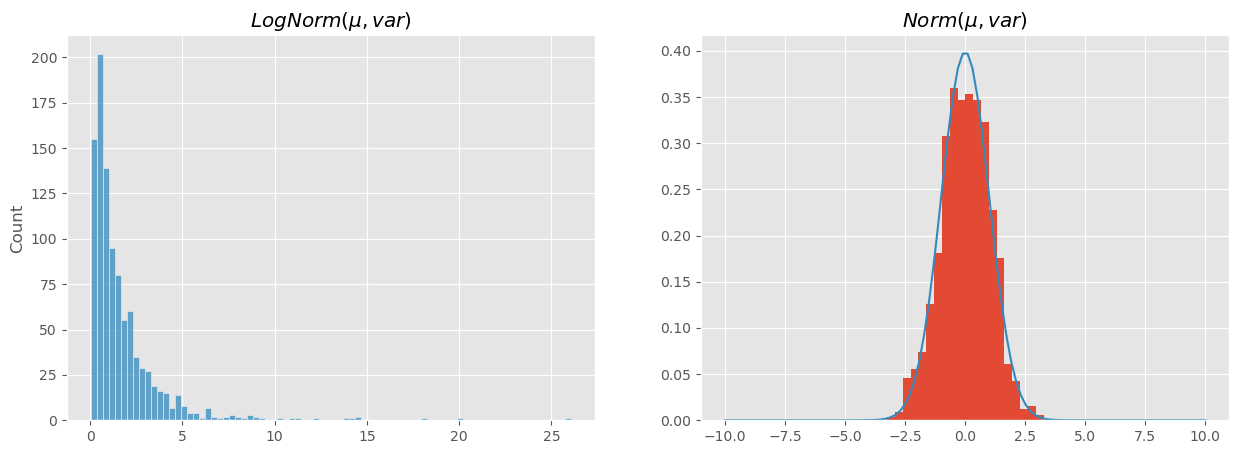

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# моделим выборку из X ~ LogN(mu, var) 
input_arr = stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=size)

# строим распределение логнорм выборки
sns.histplot(input_arr, ax=axs[0]).set_title('$LogNorm(\mu, var)$')

# логарифмируем выборку
axs[1].hist(np.log(input_arr), density=True, bins=20)

# на этих же осях строим для проверки соотв норм распр-е
x = np.linspace(-10, 10, 100)
pdf = stats.norm(loc=mu, scale=np.sqrt(var)).pdf(x)
axs[1].plot(x, pdf)
axs[1].set_title('$Norm(\mu, var)$')

plt.show()

__Теперь сделаем _ДЗ___

Если: \
$X_{1},..,X_{n} \sim 339 + LogNorm(\mu, var)$ \
Тогда: \
$(X_{1}-339),..,(X_{n}-339) \sim LogNorm(\mu, var)$ \
$ln(X_{1}-339),..,ln(X_{n}-339) \sim Norm(\mu, var)$ \
А мы знаем, что оценка $\hat{\mu} =  \overline{X}$ является несмещенной, состоятельной и эффективной оценкой для мат.ож. нормального распределения. \
В нашем случае: $\hat{\mu} =  \overline{ln(X_{i}-339)} = \frac{1}{n}\sum_{i}ln(X_{i}-339)$

In [5]:
def estimate_mu(arr):
    ''' Строим выборочную оценку параметра mu.
        В качестве оценки для mu возьмем mean(ln(Xi - 339))'''
    return np.log(arr - 339).mean()

In [6]:
def lognorm_test(mu, var):
    ''' 
    Функция для моделирования задачи для различных размеров выборок
    1. Генерируем наборы выборок для разного size(10,100,1000).
       Для каждого size берем n_samples выборок по size элементов
    2. Строим статистики для разного size
    3. Считаем MSE для каждого набора выборок
    '''
    mse_arr = []
    for size in [10,100,1000]:
        input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=(n_samples, size))
        statistic = np.apply_along_axis(estimate_mu, 1, input_arr)
        mse_arr.append([size, ((statistic - mu)**2).mean()])
    return mse_arr

lognorm_test(0,2)

[[10, 0.21929551943482362],
 [100, 0.02015876520609048],
 [1000, 0.0020380602528727323]]

__Проверим оценку для $\hat{\mu} = \sum_{i} ln(X_{i} - 339)$ на несмещенность__ \
Смоделируем случ.вел и проверим, что $E(\hat{\theta}) = \theta$

In [14]:
mu, var = 8, 1  # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 1000     # размер выборок

In [15]:
input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=(n_samples, size))
statistic = np.apply_along_axis(estimate_mu, 1, input_arr)

<AxesSubplot:>

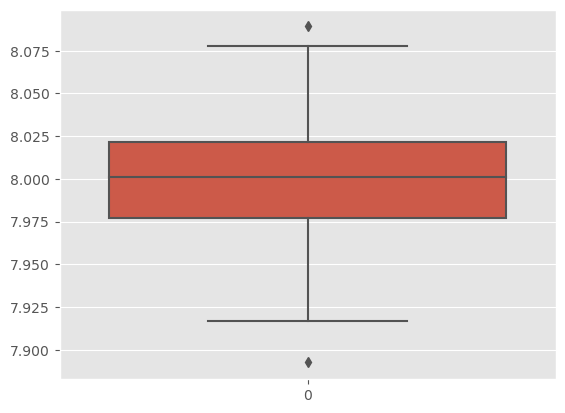

In [16]:
sns.boxplot(data=statistic)

__Проверим оценку для $\hat{\mu} = \sum_{i} ln(X_{i} - 339)$ на состоятельность__ \
Смоделируем случ.вел и проверим, что $\hat{\theta} \xrightarrow{p} \theta$

In [36]:
mu, var = 4.5, 3 # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 100      # размер выборок

In [37]:
ans = []
for n in range(100, 10000): 
    input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=n)
    ans.append(estimate_mu(input_arr))


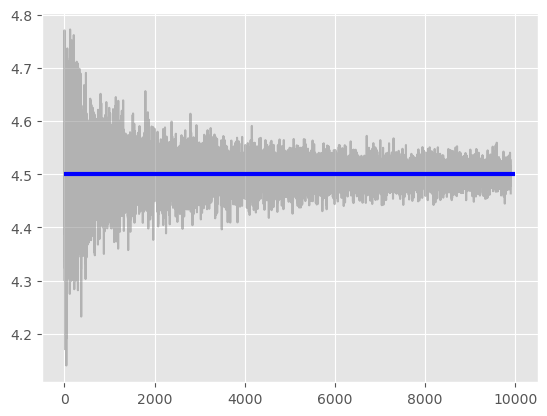

In [53]:
sns.lineplot(data=ans, color='grey', alpha = 0.5)
plt.hlines(mu, 0, 10000, color='blue', lw=3, label='реальное значение')

## Задача №2

<div>
<img src="../data/matstat2.jpg" width="600"/>
</div>

Если выборка: $X_{1},..,X_{n} \sim U(a, b)$ \
Требуется построить дов.инт. для п-ра $b$. \
Для данного п-ра можно построить два вида доверительного интервала: точный и асиптотический, точный будет сходиться к асимп при &uarr; размера выборки. \
Причем оценку для $\theta$ возмем: $\hat{\theta} = X_{max}$ (из метода макс. правд.)
1. Точный: \
    $\mathbb{P}(X_{max} / \sqrt[n]\alpha \le \theta \le X_{max}) = 1 - \alpha$ 
2. Асимптотический: (изначально оценивает $E(X) = \theta/2$) \
    $\mathbb{P}(2\overline{x} + 2Z_{1-\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}}  \ge \theta \ge 2\overline{x} - 2Z_{1-\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}} ) = 1 - \alpha$ 

    

In [212]:
left = 0.095 # нижняя граница равномерного распределения
right = 11 # верхняя граница раномерного распределения
alpha = 0.05 # уровень значимости
size = 1000 # размер выборки
n_samples = 400
# input_arr = stats.uniform.rvs(loc=left, scale=right, size=size)
input_arr = np.random.uniform(low=left, high=right, size=(n_samples, size))

In [213]:
int1

(10.999544443075902, 11.032545539903381, 0.03300109682747987)

In [214]:
def get_confint1(arr, p):
    ''' Функция расчета точного дов.инт для верхней границы р/м распр-я
        - arr: 1d выборка
        - p: уровень доверия
    '''
    left = arr.max()
    right = arr.max()/((1-p)**(1/len(arr)))
    return left, right

In [229]:
def get_confint2(arr, p):
    ''' Функция расчета асимп дов.инт для верхней границы р/м распр-я
        - arr: 1d выборка
        - p: уровень доверия
    '''
    mu_hat = arr.mean()
    sd_hat = arr.std(ddof=1)/np.sqrt(len(arr))
    return 2*np.array(stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat))

In [230]:
def test_intervals(p, confint_func):
    ''' Функция тестирования доверительных интервалов 
        - p: уровень доверия 
    '''
    n_samples = 500 # кол-во выборок - симуляция выборки как случ.вел
    for size in [10,100,1000,10000]:
        input_arr = np.random.uniform(low=left, high=right, size=(n_samples, size))
        n_intervals = np.apply_along_axis(func1d=confint_func, axis=1, arr=input_arr, p=p)
        prob = np.mean([r >= right and left <= right for l,r in n_intervals])
        length = np.mean([r-l for l,r in n_intervals])
        print(f'''
        Для выборок размером = {size}:
        - вероятность попадания в дов.инт. = {prob} 
        - средняя длина интервала = {length}
        ''')

test_intervals(0.95, get_confint1)
test_intervals(0.95, get_confint2)


        Для выборок размером = 10:
        - вероятность попадания в дов.инт. = 0.958 
        - средняя длина интервала = 3.496248043149698
        

        Для выборок размером = 100:
        - вероятность попадания в дов.инт. = 0.956 
        - средняя длина интервала = 0.33141609101875724
        

        Для выборок размером = 1000:
        - вероятность попадания в дов.инт. = 0.954 
        - средняя длина интервала = 0.03297086705156059
        

        Для выборок размером = 10000:
        - вероятность попадания в дов.инт. = 0.932 
        - средняя длина интервала = 0.0032954465793714294
        

        Для выборок размером = 10:
        - вероятность попадания в дов.инт. = 0.972 
        - средняя длина интервала = 7.5943582454572525
        

        Для выборок размером = 100:
        - вероятность попадания в дов.инт. = 0.982 
        - средняя длина интервала = 2.4736397373735355
        

        Для выборок размером = 1000:
        - вероятность попадания в дов.и

__Точный дов.инт. оказывает предпочтительнее__